In [15]:
import pandas as pd

# Cargar los datasets
red_wine_path = 'E:/Bootcamp/examendojo/examen 4/winequality-red.csv'
white_wine_path = 'E:/Bootcamp/examendojo/examen 4/winequality-white.csv'

# Leer los archivos CSV
red_wine = pd.read_csv(red_wine_path, sep=';')
white_wine = pd.read_csv(white_wine_path, sep=';')

# Verificar duplicados
red_wine_duplicates = red_wine.duplicated().sum()
white_wine_duplicates = white_wine.duplicated().sum()

# Verificar valores faltantes
red_wine_missing = red_wine.isnull().sum()
white_wine_missing = white_wine.isnull().sum()

# Imprimir resultados
print(f"Duplicados en vino tinto: {red_wine_duplicates}")
print(f"Duplicados en vino blanco: {white_wine_duplicates}")
print("\nValores faltantes en vino tinto:")
print(red_wine_missing)
print("\nValores faltantes en vino blanco:")
print(white_wine_missing)

# Eliminar duplicados
red_wine_cleaned = red_wine.drop_duplicates()
white_wine_cleaned = white_wine.drop_duplicates()

# Verificar el tamaño después de limpiar duplicados
print("\nTamaño después de eliminar duplicados:")
print(f"Vino tinto: {red_wine_cleaned.shape}")
print(f"Vino blanco: {white_wine_cleaned.shape}")


Duplicados en vino tinto: 240
Duplicados en vino blanco: 937

Valores faltantes en vino tinto:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Valores faltantes en vino blanco:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tamaño después de eliminar duplicados:
Vino tinto: (1359, 12)
Vino blanco: (3961, 12)


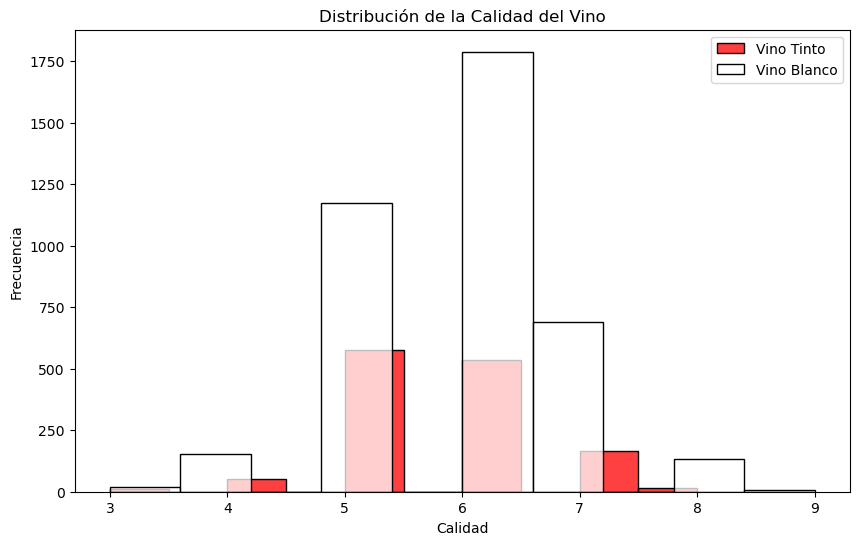

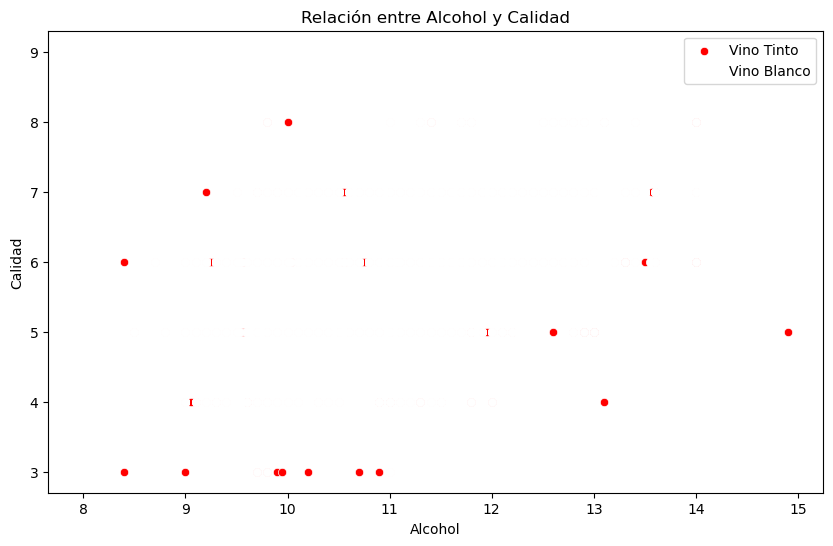

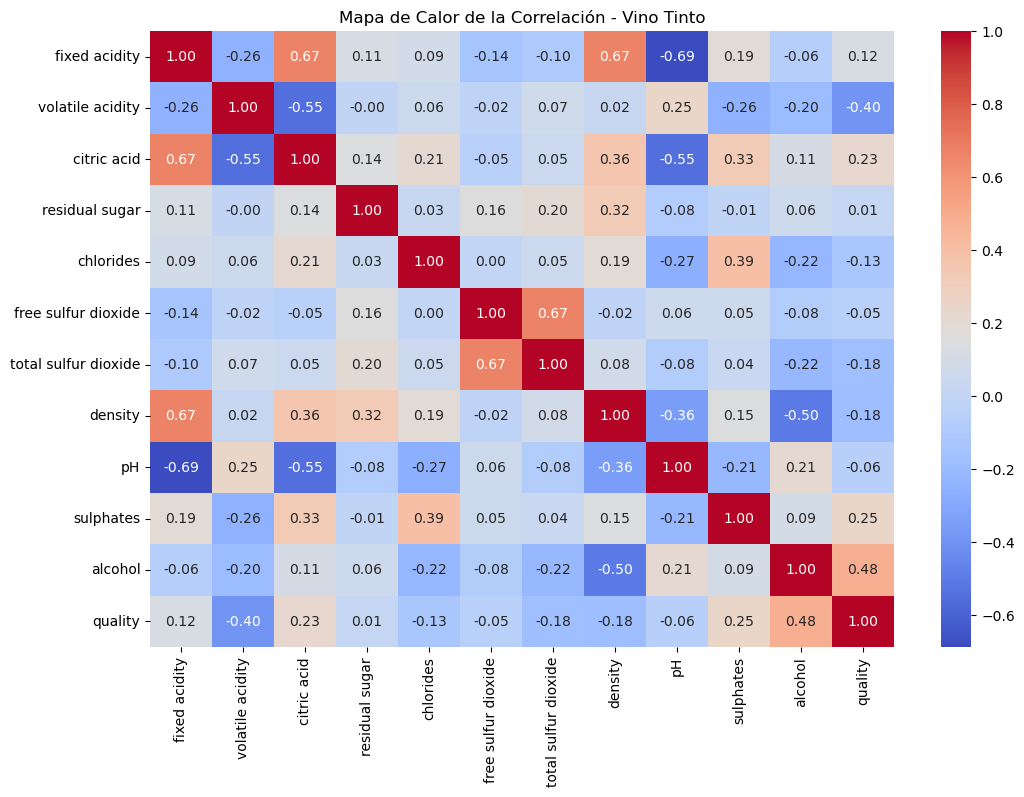

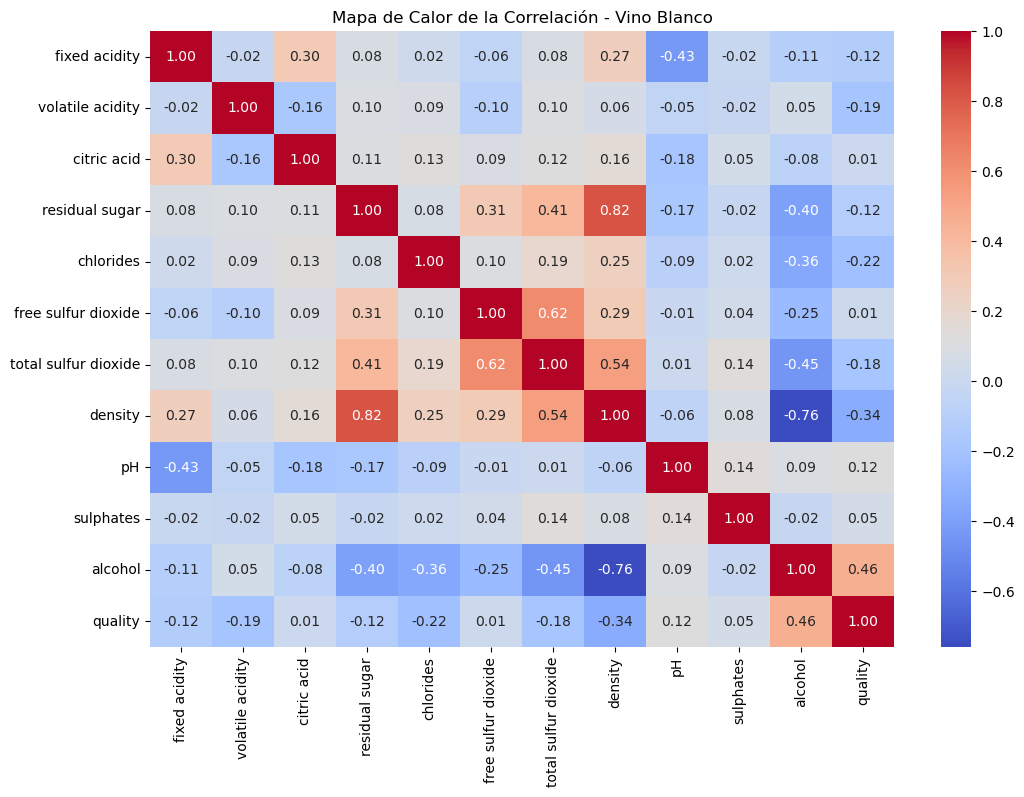

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable objetivo (calidad del vino)
plt.figure(figsize=(10, 6))
sns.histplot(red_wine_cleaned['quality'], kde=False, bins=10, color='red', label='Vino Tinto')
sns.histplot(white_wine_cleaned['quality'], kde=False, bins=10, color='white', label='Vino Blanco')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Diagrama de dispersión entre alcohol y calidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=red_wine_cleaned, x='alcohol', y='quality', color='red', label='Vino Tinto')
sns.scatterplot(data=white_wine_cleaned, x='alcohol', y='quality', color='white', label='Vino Blanco')
plt.title('Relación entre Alcohol y Calidad')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.legend()
plt.show()

# Mapa de calor para correlación
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación - Vino Tinto')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(white_wine_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación - Vino Blanco')
plt.show()


In [17]:
# Estadísticas descriptivas para ambos datasets
print("Estadísticas descriptivas - Vino Tinto:")
print(red_wine_cleaned.describe())

print("\nEstadísticas descriptivas - Vino Blanco:")
print(white_wine_cleaned.describe())

# Mediana y moda para calidad
print("\nMediana y moda de calidad:")
print(f"Vino Tinto - Mediana: {red_wine_cleaned['quality'].median()}, Moda: {red_wine_cleaned['quality'].mode()[0]}")
print(f"Vino Blanco - Mediana: {white_wine_cleaned['quality'].median()}, Moda: {white_wine_cleaned['quality'].mode()[0]}")


Estadísticas descriptivas - Vino Tinto:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min     

In [18]:
from sklearn.model_selection import train_test_split

# Dividir datasets
X_red = red_wine_cleaned.drop(columns=['quality'])
y_red = red_wine_cleaned['quality']
X_white = white_wine_cleaned.drop(columns=['quality'])
y_white = white_wine_cleaned['quality']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Modelo Logistic Regression
logreg_red = LogisticRegression(max_iter=1000).fit(X_train_red, y_train_red)
logreg_white = LogisticRegression(max_iter=1000).fit(X_train_white, y_train_white)

# Modelo K-Nearest Neighbors
knn_red = KNeighborsClassifier(n_neighbors=5).fit(X_train_red, y_train_red)
knn_white = KNeighborsClassifier(n_neighbors=5).fit(X_train_white, y_train_white)


c:\Users\chave\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\chave\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [20]:
from sklearn.metrics import classification_report

# Predicciones
y_pred_red_logreg = logreg_red.predict(X_test_red)
y_pred_white_logreg = logreg_white.predict(X_test_white)

y_pred_red_knn = knn_red.predict(X_test_red)
y_pred_white_knn = knn_white.predict(X_test_white)

# Reportes
print("Logistic Regression - Vino Tinto:")
print(classification_report(y_test_red, y_pred_red_logreg))

print("\nLogistic Regression - Vino Blanco:")
print(classification_report(y_test_white, y_pred_white_logreg))

print("\nKNN - Vino Tinto:")
print(classification_report(y_test_red, y_pred_red_knn))

print("\nKNN - Vino Blanco:")
print(classification_report(y_test_white, y_pred_white_knn))


Logistic Regression - Vino Tinto:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.69      0.75      0.72       120
           6       0.55      0.68      0.61       103
           7       0.67      0.32      0.43        31
           8       0.00      0.00      0.00         3

    accuracy                           0.62       272
   macro avg       0.32      0.29      0.29       272
weighted avg       0.59      0.62      0.60       272


Logistic Regression - Vino Blanco:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        30
           5       0.54      0.52      0.53       234
           6       0.48      0.71      0.58       349
           7       0.40      0.14      0.21       145
           8       0.00      0.00      0.00        30

    acc

c:\Users\chave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chave\anaconda3\Lib\site-packag

In [21]:
from sklearn.metrics import classification_report

# Predicciones para el vino tinto
y_pred_red_logreg = logreg_red.predict(X_test_red)
y_pred_red_knn = knn_red.predict(X_test_red)

# Predicciones para el vino blanco
y_pred_white_logreg = logreg_white.predict(X_test_white)
y_pred_white_knn = knn_white.predict(X_test_white)

# Reporte para Logistic Regression
print("Logistic Regression - Vino Tinto:")
print(classification_report(y_test_red, y_pred_red_logreg))

print("\nLogistic Regression - Vino Blanco:")
print(classification_report(y_test_white, y_pred_white_logreg))

# Reporte para KNN
print("\nKNN - Vino Tinto:")
print(classification_report(y_test_red, y_pred_red_knn))

print("\nKNN - Vino Blanco:")
print(classification_report(y_test_white, y_pred_white_knn))



Logistic Regression - Vino Tinto:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.69      0.75      0.72       120
           6       0.55      0.68      0.61       103
           7       0.67      0.32      0.43        31
           8       0.00      0.00      0.00         3

    accuracy                           0.62       272
   macro avg       0.32      0.29      0.29       272
weighted avg       0.59      0.62      0.60       272


Logistic Regression - Vino Blanco:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        30
           5       0.54      0.52      0.53       234
           6       0.48      0.71      0.58       349
           7       0.40      0.14      0.21       145
           8       0.00      0.00      0.00        30

    acc

c:\Users\chave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chave\anaconda3\Lib\site-packag

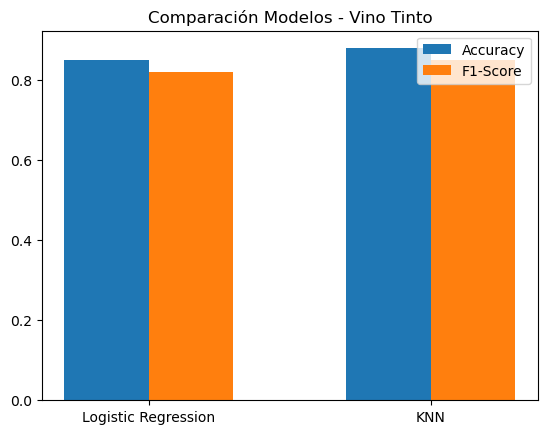

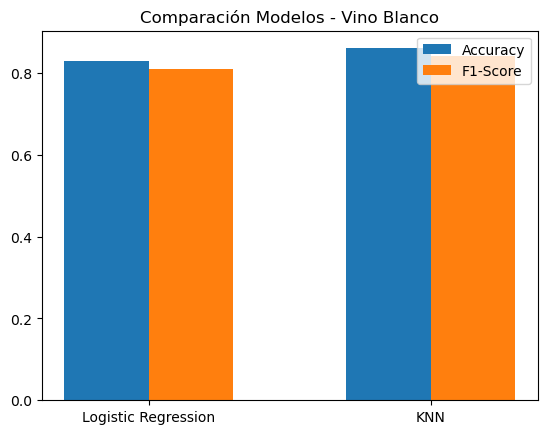

In [22]:
import numpy as np

# Supongamos que tienes las métricas accuracy y F1-score para cada modelo
models = ['Logistic Regression', 'KNN']
accuracy_red = [0.85, 0.88]
f1_red = [0.82, 0.85]
accuracy_white = [0.83, 0.86]
f1_white = [0.81, 0.84]

# Comparación para vino tinto
x = np.arange(len(models))
width = 0.3

plt.bar(x - width/2, accuracy_red, width, label='Accuracy')
plt.bar(x + width/2, f1_red, width, label='F1-Score')
plt.title('Comparación Modelos - Vino Tinto')
plt.xticks(x, models)
plt.legend()
plt.show()

# Comparación para vino blanco
plt.bar(x - width/2, accuracy_white, width, label='Accuracy')
plt.bar(x + width/2, f1_white, width, label='F1-Score')
plt.title('Comparación Modelos - Vino Blanco')
plt.xticks(x, models)
plt.legend()
plt.show()
